# **Modelo predictivo del status free survival de pacientes con cáncer de mama**

# Índice

## 1. [Características del Dataset](#1-características-del-dataset)
## 2. [Variables](#3-variables)
## 3. [Limpieza de Datos](#3-limpieza-de-datos)
### - 3.1 [Missing Values](#31-missing-values)


In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [70]:
df = pd.read_csv("../Data/Breast_Cancer_METABRIC.csv")


In [71]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [45]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

# 1. Características del Dataset

- Número de instances: 
- Número de variables:

## 1.1 Descripción de variables en estudios de cáncer de mama

A continuación, una breve descripción de cada una de estas variables basándome en la terminología médica y los contextos comunes en estudios de cáncer de mama. Estas definiciones pueden variar ligeramente dependiendo del sistema de registro utilizado, pero en general representan las siguientes características:

- **Patient ID:** Un identificador único para cada paciente.
- **Age at Diagnosis:** La edad del paciente en el momento del diagnóstico.
- **Type of Breast Surgery:** El tipo de cirugía mamaria que recibió el paciente (por ejemplo, mastectomía, tumorectomía).
- **Cancer Type:** El tipo general de cáncer (como carcinoma ductal, carcinoma lobulillar).
- **Cancer Type Detailed:** Una descripción más específica del tipo de cáncer.
- **Cellularity:** El grado de celularidad del tumor, que indica la densidad de células cancerígenas presentes.
- **Chemotherapy:** Indica si el paciente recibió quimioterapia como parte de su tratamiento.
- **Pam50 + Claudin-low subtype:** Un subgrupo molecular del cáncer basado en la clasificación PAM50, que incluye información sobre la expresión génica y la clasificación de subtipos como luminal A, luminal B, HER2-enriquecido, entre otros.
- **Cohort:** El grupo o cohorte al que pertenece el paciente dentro del estudio.
- **ER status measured by IHC:** Estado del receptor de estrógeno medido por inmunohistoquímica (IHC), que puede ser positivo o negativo.
- **ER Status:** Simplificación del estado del receptor de estrógeno (positivo o negativo).
- **Neoplasm Histologic Grade:** El grado histológico del tumor, que indica qué tan anormales se ven las células cancerosas bajo el microscopio y qué tan probable es que crezcan y se diseminen.
- **HER2 status measured by SNP6:** Estado del receptor HER2 medido mediante análisis genético, como el de un microarray de SNP.
- **HER2 Status:** Simplificación del estado HER2 (positivo, negativo o indeterminado).
- **Tumor Other Histologic Subtype:** Subtipo histológico adicional del tumor, que proporciona detalles más granulares sobre la clasificación histológica.
- **Hormone Therapy:** Indica si el paciente recibió terapia hormonal como parte del tratamiento.
- **Inferred Menopausal State:** Estado menopáusico inferido del paciente (por ejemplo, premenopáusica o postmenopáusica).
- **Integrative Cluster:** Una clasificación molecular que agrupa tumores con características similares basadas en múltiples tipos de datos moleculares.
- **Primary Tumor Laterality:** La lateralidad del tumor primario, indicando si el tumor estaba en el seno izquierdo o derecho.
- **Lymph nodes examined positive:** Número de ganglios linfáticos examinados que resultaron positivos para células cancerígenas.
- **Mutation Count:** Número total de mutaciones identificadas en el análisis genético del tumor.
- **Nottingham prognostic index:** Un índice pronóstico calculado en función del tamaño del tumor, el grado histológico y el estado de los ganglios linfáticos, usado para predecir el resultado del cáncer de mama.
- **Oncotree Code:** Código del árbol oncológico que clasifica los cánceres en subtipos y categorías con base en características moleculares y clínicas.
- **Overall Survival (Months):** Tiempo total de supervivencia en meses desde el diagnóstico o inicio del tratamiento hasta la muerte o la última revisión.
- **Overall Survival Status:** Estado de supervivencia general (si el paciente sigue vivo o ha fallecido).
- **PR Status:** Estado del receptor de progesterona (positivo o negativo).
- **Radio Therapy:** Indica si el paciente recibió radioterapia como parte del tratamiento.
- **Relapse Free Status (Months):** Tiempo en meses en que el paciente permaneció libre de recaídas después del tratamiento inicial.
- **Relapse Free Status:** Indica si el paciente ha experimentado una recaída.
- **Sex:** Sexo del paciente (masculino, femenino u otro).
- **3-Gene classifier subtype:** Un subgrupo del cáncer basado en la expresión de tres genes específicos, utilizado para clasificar tumores.
- **Tumor Size:** Tamaño del tumor primario, generalmente en milímetros.
- **Tumor Stage:** Etapa del cáncer, que describe la extensión de la enfermedad (por ejemplo, etapa I, II, III o IV).
- **Patient's Vital Status:** Estado vital del paciente al momento del análisis (vivo o fallecido).

Estas definiciones te permiten comprender qué tipo de información representa cada variable y cómo podrían relacionarse con el análisis clínico y pronóstico del cáncer de mama.


In [46]:
df.dtypes

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         

In [47]:
df.shape

(2509, 34)

### Información Demográfica y de Estado Fisiológico

    ### Tipo de Cáncer y Clasificación Molecular

3 gene classifier subtype es un metodo de claisficacion para el cancer de mama que se basa en la deteccion de 3 genes:

    - Receptor de Estrógeno (ER): Indica la presencia de receptores hormonales y está asociado con los subtipos luminales.

    - HER2 (ERBB2): Su sobreexpresión caracteriza al subtipo HER2 positivo.

    - Aurora Quinasa A (AURKA): Relacionado con la proliferación celular y frecuentemente asociado con subtipos de mayor agresividad.

In [52]:
df['3-Gene classifier subtype'].isnull().sum()

np.int64(745)

Tiene muchos missing values vamos a ver si podemos presicindir de esta variable en el caso de que encontremos otra que nos de la misma información.

In [53]:
df['3-Gene classifier subtype'].unique()

array(['ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif',
       'HER2+'], dtype=object)

A continuación, se detallan brevemente estos subgrupos de Integrative clusters:

- IntClust 1: Constituido por tumores ER-positivos, predominantemente clasificados como subtipo luminal B. Caracterizado por la amplificación de la región 17q23 y una alta frecuencia de mutaciones en el gen GATA3.

- IntClust 2: Compuesto por tumores ER-positivos, incluyendo tanto luminal A como luminal B. Asociado con la peor prognosis entre los tumores ER-positivos, con amplificación notable en las regiones 11q13/14.

- IntClust 3: Principalmente incluye casos luminal A y está enriquecido con subtipos histológicos de buen pronóstico, como carcinomas lobulillares y tubulares. Presenta baja inestabilidad genómica y una alta frecuencia de mutaciones en PIK3CA, CDH1 y RUNX1.

- IntClust 4: Un grupo único que incorpora tanto casos ER-positivos como ER-negativos, incluyendo un 26% de todos los tumores triple negativos. A pesar de esta mezcla, está asociado con un pronóstico favorable.

- IntClust 5: Engloba los cánceres con amplificación de ERBB2 (HER2), compuestos por casos HER2-enriquecidos ER-negativos y luminales ER-positivos. Antes de la disponibilidad general de trastuzumab, este grupo mostraba la peor supervivencia específica a 10 años.

- IntClust 6: Un subgrupo distinto de tumores ER-positivos, que comprende tanto luminal A como luminal B. Caracterizado por la amplificación de la región 8p12 y bajos niveles de mutaciones en PIK3CA.

 
- IntClust 7: Predominantemente compuesto por tumores ER-positivos luminal A, asociado con un buen pronóstico. Caracterizado por ganancias en 16p y pérdidas en 16q, así como una alta frecuencia de mutaciones en MAP3K1 y CTCF.
- IntClust 8: Similar a IntClust 7, incluye tumores ER-positivos luminal A. Definido por el evento clásico de ganancia en 1q/pérdida en 16q y altas frecuencias de mutaciones en PIK3CA, GATA3 y MAP2K4.
- IntClust 9: Compuesto por una mezcla de subtipos intrínsecos, pero incluye un gran número de casos ER-positivos luminal B. Caracterizado por alta inestabilidad genómica, mutaciones frecuentes en TP53 y amplificaciones en 8q y 20q.
- IntClust 10: Incorpora principalmente tumores triple negativos del subtipo basal-like. Aunque representa un grupo de alto riesgo en los primeros 5 años después del diagnóstico, más allá de este período, el pronóstico es relativamente bueno. Caracterizado por pérdidas en 5q y ganancias en 8q, 10p y 12p.

In [54]:
df['Integrative Cluster'].unique()

array(['4ER+', '3', '9', '7', '4ER-', nan, '5', '8', '10', '1', '2', '6'],
      dtype=object)

In [55]:
df['Integrative Cluster'].isnull().sum()

np.int64(529)

He identificado que existen varias variables que hacen relacion al tipo de cancer y clasificacion molecular:

In [56]:
df[['Cancer Type','Cancer Type Detailed','Pam50 + Claudin-low subtype','3-Gene classifier subtype','Oncotree Code','Integrative Cluster']]

,Cancer Type,Cancer Type Detailed,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Oncotree Code,Integrative Cluster
0,Breast Cancer,Breast Invasive Ductal Carcinoma,claudin-low,ER-/HER2-,IDC,4ER+
1,Breast Cancer,Breast Invasive Ductal Carcinoma,LumA,ER+/HER2- High Prolif,IDC,4ER+
2,Breast Cancer,Breast Invasive Ductal Carcinoma,LumB,NaN,IDC,3
3,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,LumB,NaN,MDLC,9
4,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,LumB,ER+/HER2- High Prolif,MDLC,9
...,...,...,...,...,...,...
2504,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,BRCA,NaN
2505,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,BRCA,NaN
2506,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,BRCA,NaN
2507,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,BRCA,NaN


In [57]:
df['Cancer Type'].unique()
df['Cancer Type Detailed'].unique()


array(['Breast Invasive Ductal Carcinoma',
       'Breast Mixed Ductal and Lobular Carcinoma',
       'Breast Invasive Lobular Carcinoma', 'Invasive Breast Carcinoma',
       'Breast Invasive Mixed Mucinous Carcinoma', 'Breast Angiosarcoma',
       'Breast', 'Metaplastic Breast Cancer'], dtype=object)

Podriamos eliminar la columna de cancer type, aunque habría que buscar una manera de categorizar o agrupar la informacion de la variable cancer type detailed o al revés simplificar y quedarme con la informacion de la variable type of cancer y quizá categorizar tre breast cancer y breast sarcoma

### Características del Tumor

- **Tumor Size** → Tamaño del tumor.
- **Tumor Stage** → Etapa del cáncer según su extensión.
- **Neoplasm Histologic Grade** → Grado histológico del tumor.
- **Tumor Other Histologic Subtype** → Otro subtipo histológico del tumor.
- **Primary Tumor Laterality** → Lado del cuerpo donde se encuentra el tumor.


### Estado de los Receptores Tumorales

- **ER Status** y **ER status measured by IHC** → Estado del receptor de estrógeno.
- **HER2 Status** y **HER2 status measured by SNP6** → Estado del receptor HER2.
- **PR Status** → Estado del receptor de progesterona.


### Tratamientos Recibidos

- **Type of Breast Surgery** → Tipo de cirugía realizada.
- **Chemotherapy** → Tratamiento con quimioterapia.
- **Hormone Therapy** → Tratamiento hormonal.
- **Radio Therapy** → Radioterapia.


### Propagación del Cáncer y Progresión

- **Lymph nodes examined positive** → Número de ganglios linfáticos positivos.
- **Mutation Count** → Número total de mutaciones detectadas.

### Pronóstico y Supervivencia

- **Nottingham prognostic index** → Índice pronóstico basado en el tamaño del tumor, ganglios positivos y grado histológico.
- **Overall Survival (Months)** y **Overall Survival Status** → Supervivencia global en meses y estado del paciente.
- **Relapse Free Status (Months)** y **Relapse Free Status** → Tiempo libre de recaída y estado de la recaída.
- **Patient's Vital Status** → Estado vital del paciente (vivo o fallecido).



In [62]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [63]:
df[['Nottingham prognostic index','Overall Survival Status','Relapse Free Status',"Patient's Vital Status",]]

,Nottingham prognostic index,Overall Survival Status,Relapse Free Status,Patient's Vital Status
0,6.044,Living,Not Recurred,Living
1,4.020,Living,Not Recurred,Living
2,4.030,Deceased,Recurred,Died of Disease
3,4.050,Living,Not Recurred,Living
4,6.080,Deceased,Recurred,Died of Disease
...,...,...,...,...
2504,2.540,NaN,Recurred,NaN
2505,4.560,NaN,Recurred,NaN
2506,NaN,NaN,NaN,NaN
2507,NaN,NaN,NaN,NaN


### Explicación de las Variables

#### **Nottingham Prognostic Index (NPI)**
Es un índice utilizado para predecir el pronóstico en pacientes con cáncer de mama. Se calcula con la fórmula:

\[
NPI = 0.2 \times \text{Tamaño del tumor (cm)} + \text{Grado del tumor} + \text{Estadio de los ganglios linfáticos}
\]

Valores altos (**>5.4**) indican mayor riesgo de recurrencia o peor supervivencia.

🔹 **Ejemplo**: Un valor de **6.044** sugiere un pronóstico menos favorable que **4.020**.

---

#### **Overall Survival Status (Estado de Supervivencia Global)**
Indica si el paciente está **vivo (Living)** o **fallecido (Deceased)** al final del estudio.

🔹 **Ejemplo**: Si un paciente tiene `"Deceased"`, significa que murió durante el periodo de seguimiento.

---

#### **Relapse Free Status (Estado Libre de Recurrencia)**
Indica si el paciente ha experimentado una recurrencia del cáncer (**Recurred**) o no (**Not Recurred**).

🔹 **Ejemplo**: `"Recurred"` implica que el cáncer reapareció **después del tratamiento inicial.**

---

#### **Patient's Vital Status (Estado Vital del Paciente)**
Similar al **Overall Survival Status**, pero puede incluir detalles adicionales sobre la causa de muerte (ej. `"Died of Disease"`).

🔹 **Ejemplo**: `"Died of Disease"` especifica que el fallecimiento está relacionado directamente con el cáncer.


In [58]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [64]:
discrepantes = df[(df["Overall Survival Status"] == "Deceased") & (df["Patient's Vital Status"] != "Died of Disease") |
                 (df["Overall Survival Status"] == "Living") & (df["Patient's Vital Status"] != "Living")]

In [65]:
print(df[["Overall Survival Status", "Patient's Vital Status"]].isnull().sum())


Overall Survival Status    528
Patient's Vital Status     529
dtype: int64


In [66]:
tabla_concordancia = pd.crosstab(
    df["Overall Survival Status"],
    df["Patient's Vital Status"],
    margins=True,
    margins_name="Total")

In [68]:
tabla_concordancia

Patient's Vital Status,Died of Disease,Died of Other Causes,Living,Total
Overall Survival Status,,,,
Deceased,646,497,0,1143
Living,0,0,837,837
Total,646,497,837,1980


# 3. Limpieza de datos
## 3.1 Missing values

C:\Users\JUTHA\AppData\Local\Temp\ipykernel_4524\2408794221.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.isnull().sum().sort_values(ascending=False).values,


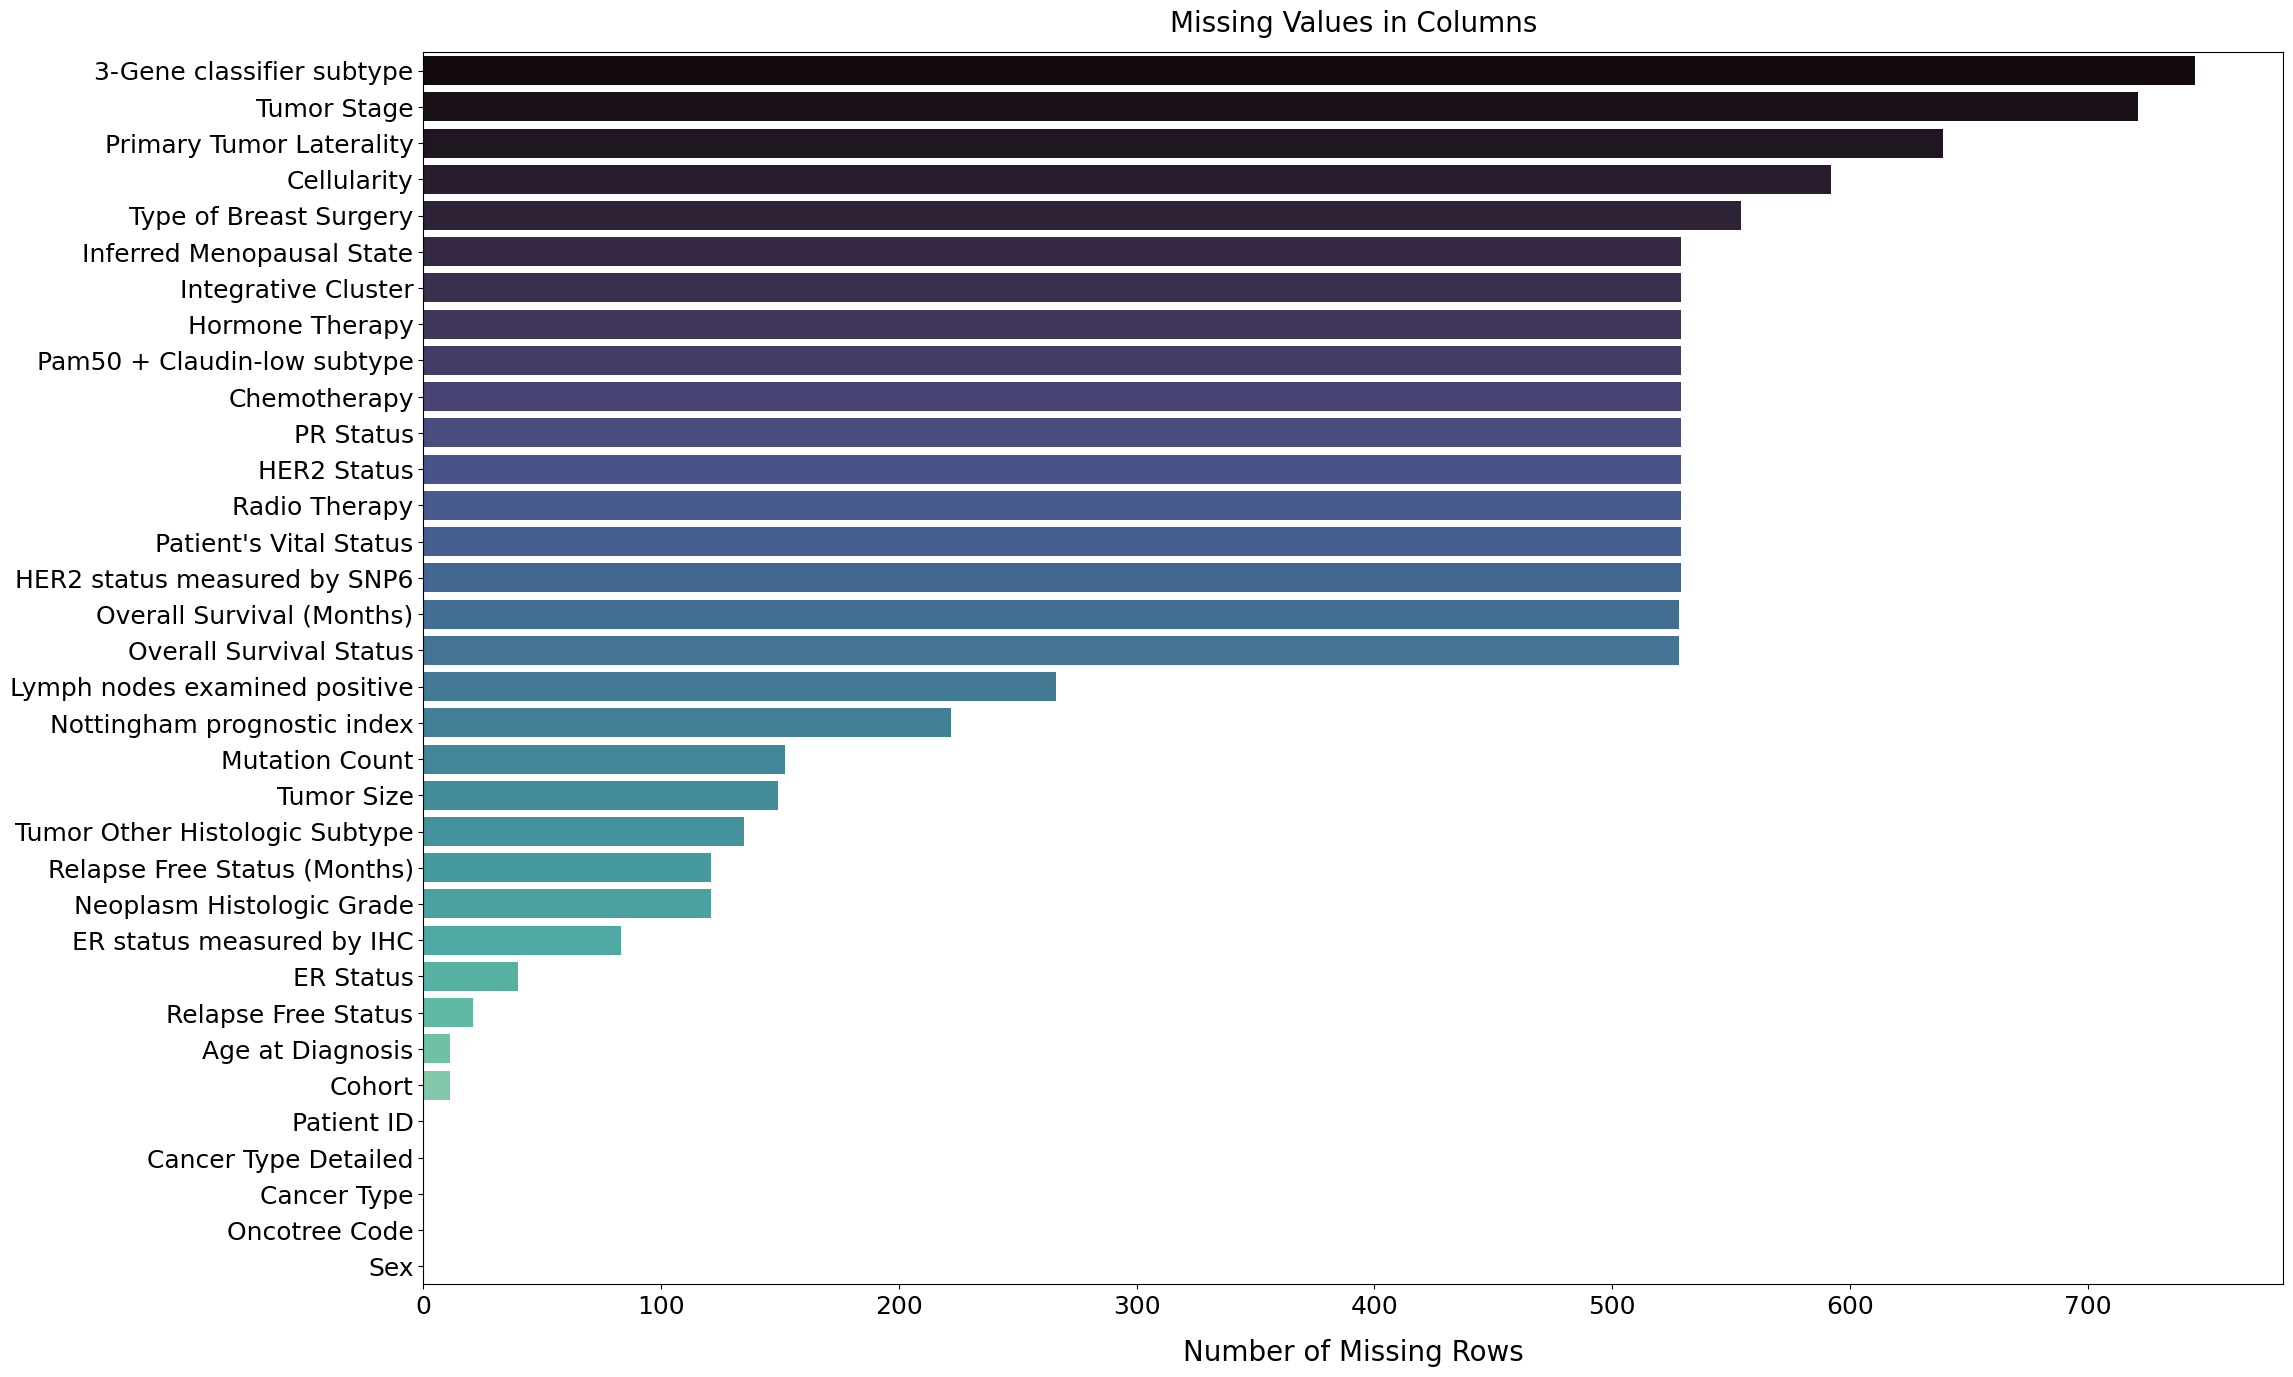

,3-Gene classifier subtype,HER2 Status
0,ER-/HER2-,Negative
1,ER+/HER2- High Prolif,Negative
2,NaN,Negative
3,NaN,Negative
4,ER+/HER2- High Prolif,Negative
...,...,...
2504,NaN,NaN
2505,NaN,NaN
2506,NaN,NaN
2507,NaN,NaN


In [61]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
fig = plt.figure(figsize=(24, 16))

sns.barplot(x=df.isnull().sum().sort_values(ascending=False).values,
            y=df.isnull().sum().sort_values(ascending=False).index,
            palette="mako")

plt.xlabel('Number of Missing Rows', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Missing Values in Columns', size=20, pad=15)

plt.show()
df.columns
df[['3-Gene classifier subtype','HER2 Status']]

In [59]:
df['Cancer Type'].isnull().sum()

np.int64(0)

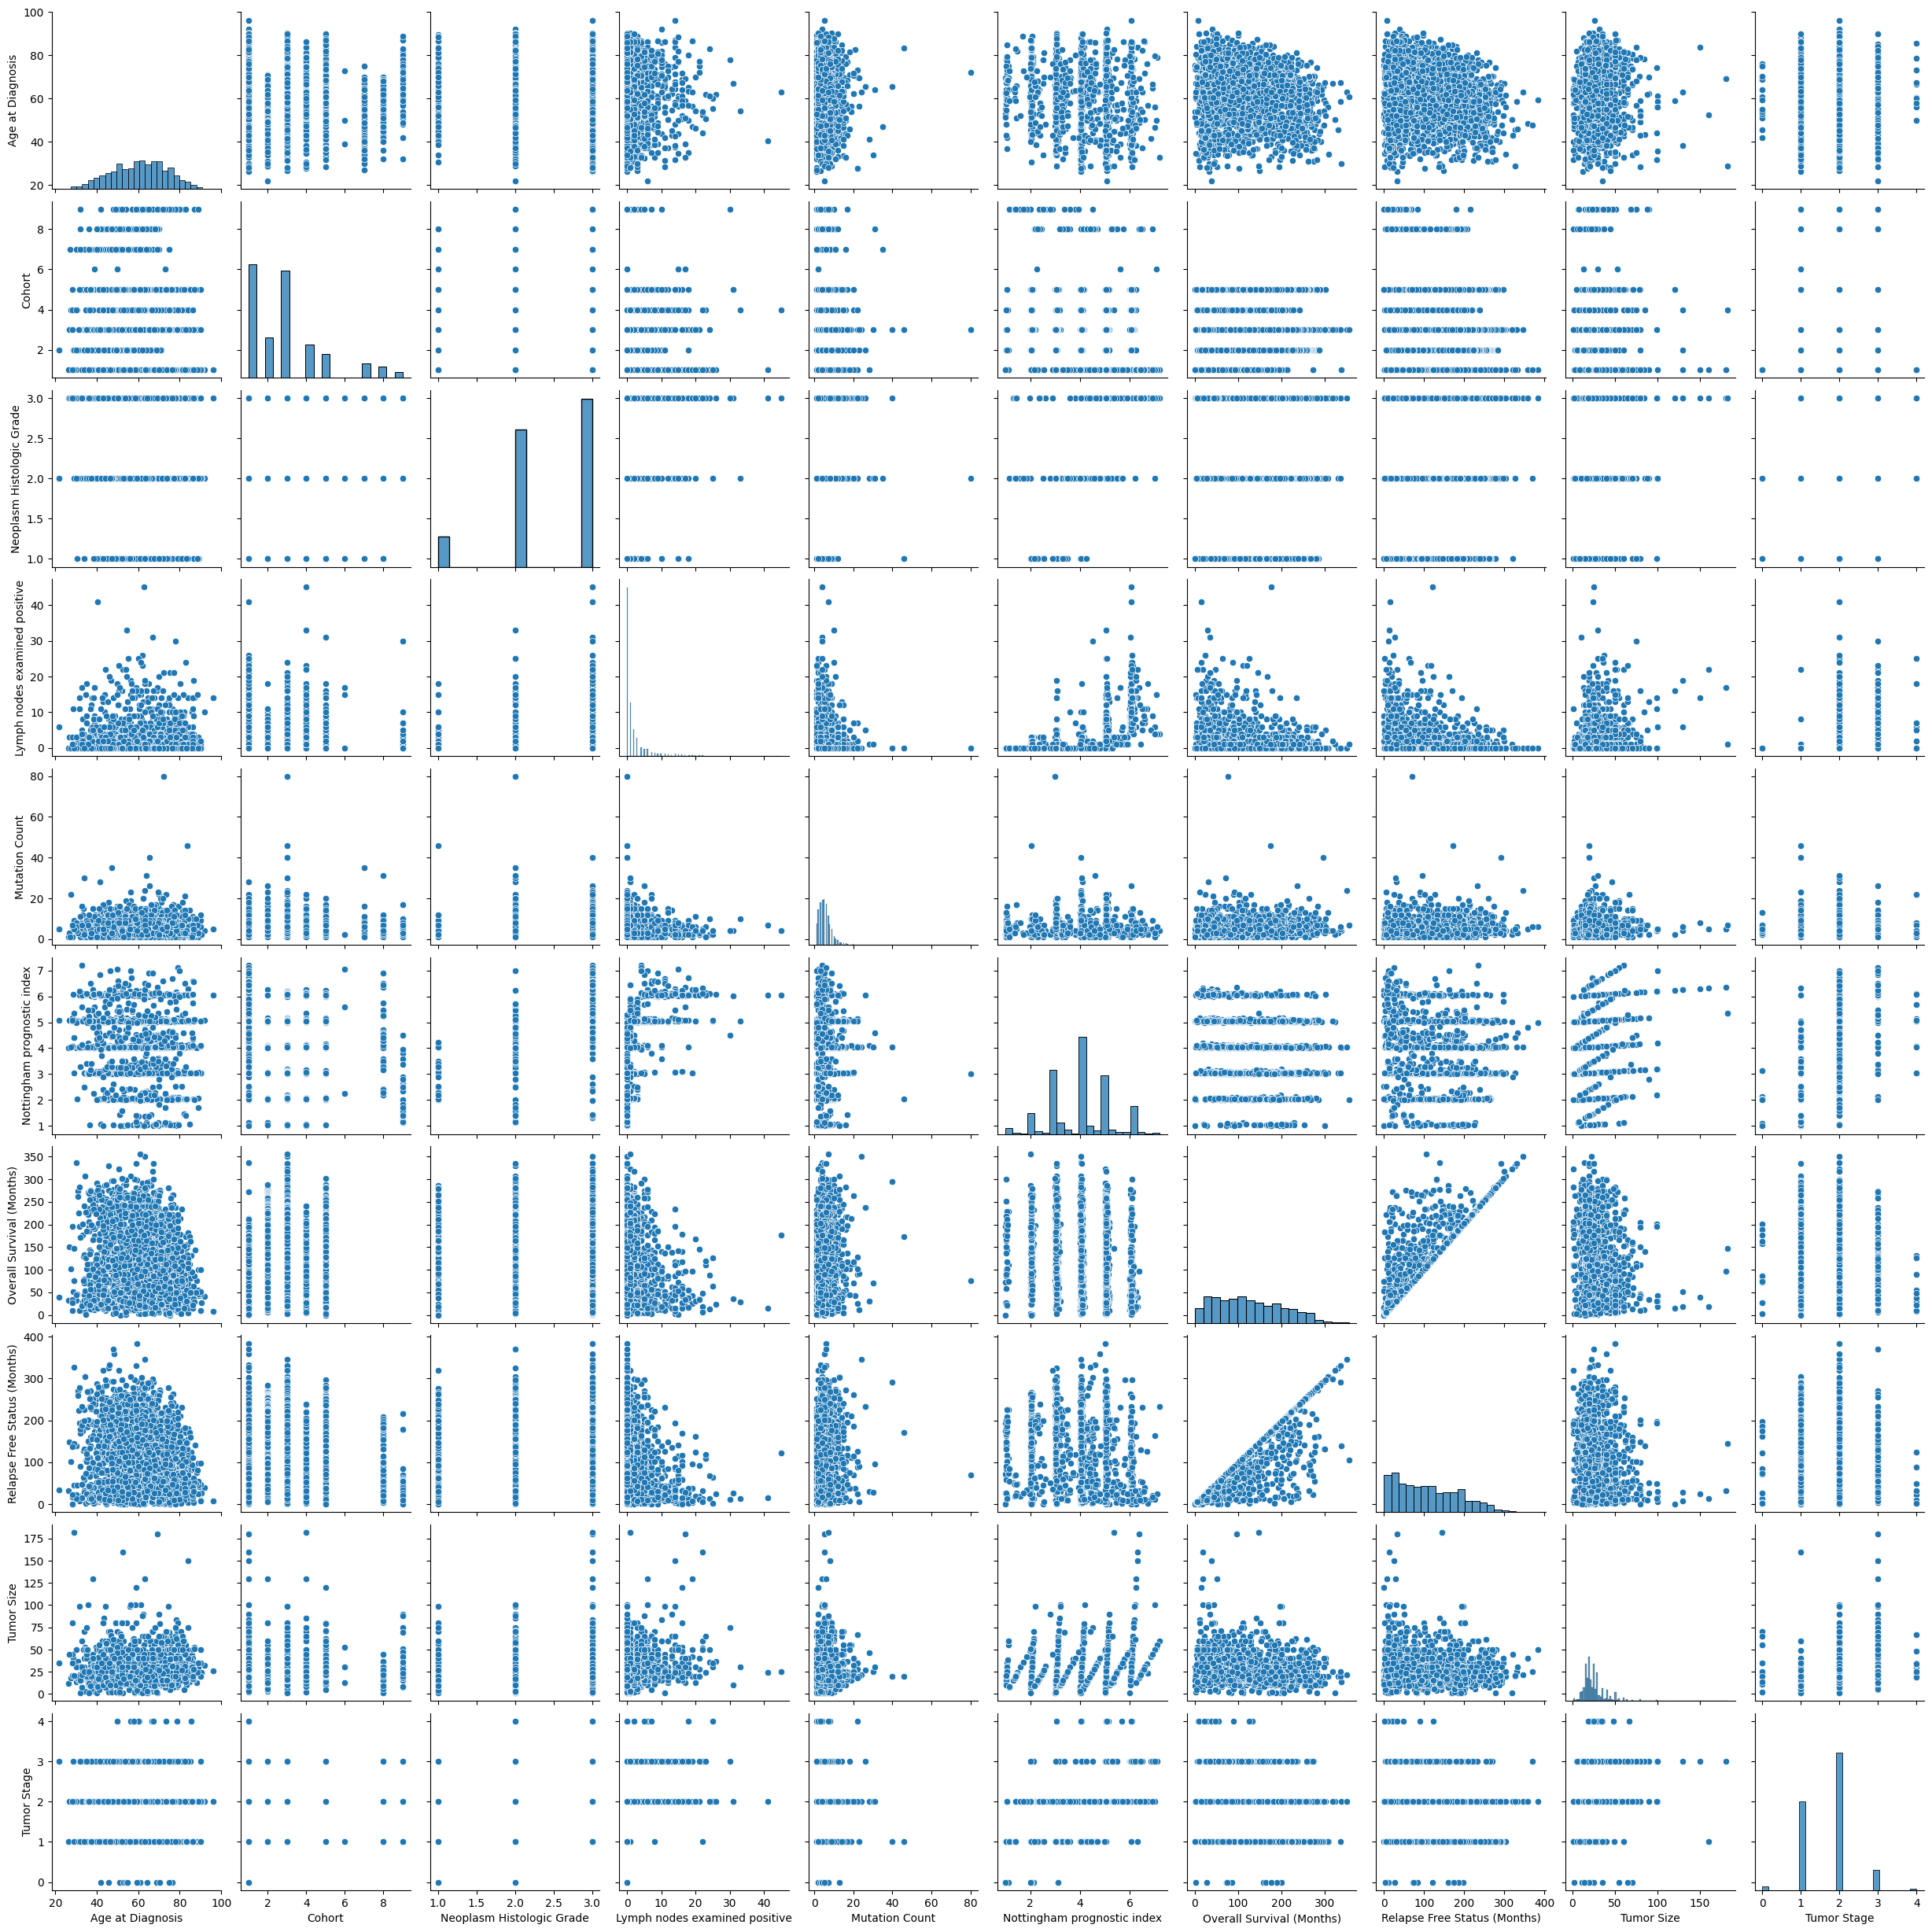

In [27]:
sns.pairplot(df)

In [ ]:
corr = df.corr(numeric_only=True)

<Axes: >

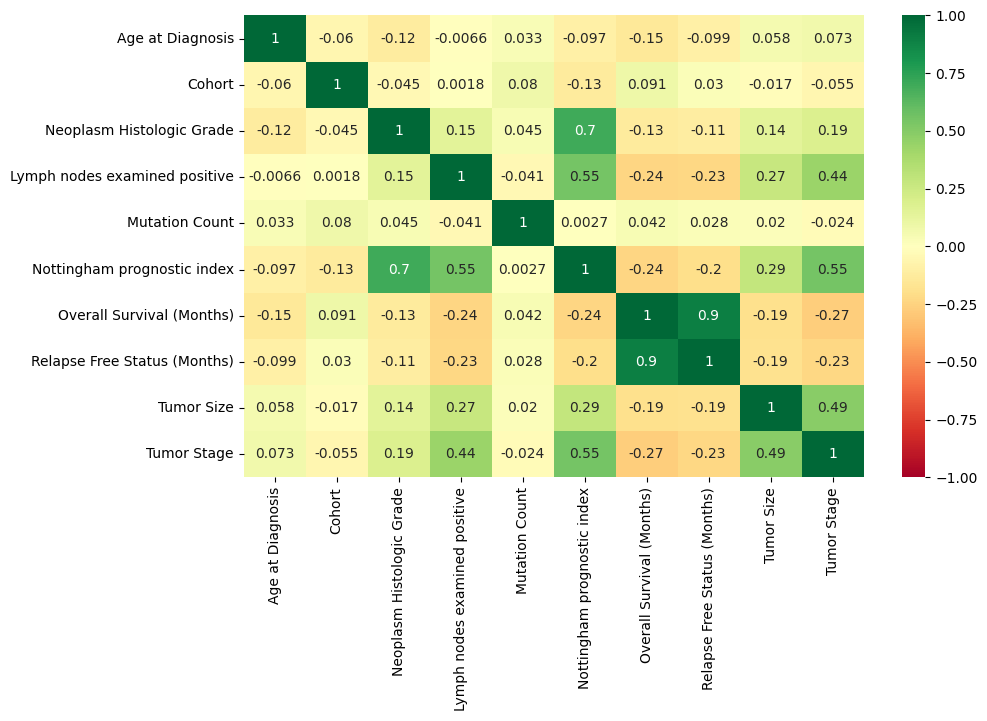

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr, 
    annot=True, 
    cmap='RdYlGn',  
    vmin=-1, 
    vmax=1,  
    center=0  
)